In [2]:
import pandas as pd
import numpy as np
import MHR as mhr
import sys
import types
import MHR as mhr
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

In [3]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
B00BGA9WK2,351,253.079772
B00A3YN0Z0,219,104.237443
B0074BW614,201,451.900498
B00CMQTVK0,165,334.696970
B0094NY3R0,147,232.972789
B0045FM6SU,140,374.121429
B00DVFLJDS,139,352.625899
B009LL9VDG,133,424.443609
B002C7481G,132,501.636364


product=B0001FTVEK ndcg=0.944221724364 (0.944221724364)


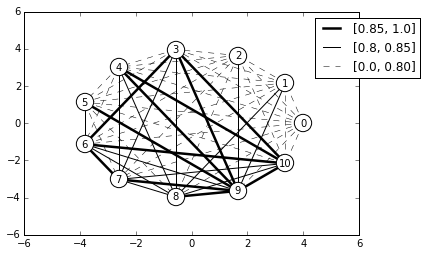

In [283]:
import matplotlib.pyplot as plt
df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0001FTVEK'])
#print reviews_features[reviews_features['asin']=='B00001WRSJ']['powerWithStar'].values
matrix, bin_matrix= mhr.getMatrix()
scores= mhr.getScores()
#import pandas as pd
import networkx as nx
#input_data = pd.read_csv('test.csv', index_col=0)





values_test = df['helpfulness'].values
#scores =df['powerWithStar'].values


node_sizes = scores * 6000


ind = (-np.array(scores)).argsort()
a = np.array(values_test)[ind]
            
            
            
#nx.draw_networkx_labels(G,pos,labels,node_size = node_sizes,font_size=8,font_color='r')
labels={}
top_nodes=(-np.array(scores)).argsort()[:3]
bot_nodes= (np.array(values_test)).argsort()[:8]

selected_nodes=np.concatenate((top_nodes, bot_nodes), axis=0)


G = nx.Graph(matrix[np.ix_(selected_nodes, selected_nodes)])
pos=nx.circular_layout(G,scale=4) #


weights = [d['weight'] for (u,v,d) in G.edges(data=True) ]

ind=0
labels={}
for node in G.nodes():
    labels[node] = ind
    ind=ind+1


        
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.85]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] <0.85 and d['weight'] >=0.8)]
enone=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <0.8]


nx.draw_networkx_edges(G,pos,edgelist=elarge, width=2.5, label="[0.85, 1.0]")
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1.0, label="[0.8, 0.85]")
nx.draw_networkx_edges(G,pos,edgelist=enone, width=0.5 , style='--' , label="[0.0, 0.80]")

nx.draw_networkx_nodes(G,pos, labels=labels, node_color='w')

nx.draw_networkx_labels(G,pos, labels=labels, font_size=10,font_family='sans-serif')

plt.legend(bbox_to_anchor=(1.2, 1.0))
#plt.title('Weighted similarity graph for the product "B0001FTVEK"')
plt.show()


product=B0001FTVEK ndcg=0.944221724364 (0.944221724364)


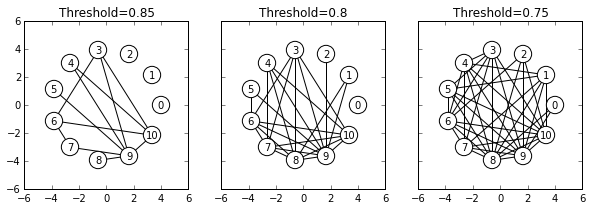

In [260]:
import matplotlib.pyplot as plt
df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0001FTVEK'])
#print reviews_features[reviews_features['asin']=='B00001WRSJ']['powerWithStar'].values
matrix, bin_matrix= mhr.getMatrix()
scores= mhr.getScores()
#import pandas as pd
import networkx as nx
#input_data = pd.read_csv('test.csv', index_col=0)



values_test = df['helpfulness'].values
#scores =df['powerWithStar'].values


node_sizes = scores * 6000


ind = (-np.array(scores)).argsort()
a = np.array(values_test)[ind]
            
            
            
#nx.draw_networkx_labels(G,pos,labels,node_size = node_sizes,font_size=8,font_color='r')

top_nodes=(-np.array(scores)).argsort()[:3]
bot_nodes= (np.array(values_test)).argsort()[:8]

selected_nodes=np.concatenate((top_nodes, bot_nodes), axis=0)



G = nx.Graph(matrix[np.ix_(selected_nodes, selected_nodes)])

pos=nx.circular_layout(G,scale=4) #
#pos=nx.spring_layout(G) #


labelsx={}
ind=0
for node in G.nodes():
    labelsx[node] = ind
    ind=ind+1
    
    

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(10,3))

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.85]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] >=0.8)]
enone=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.75]


#ax1
nx.draw_networkx_nodes(G,pos, ax=ax1, labels=labelsx, node_color='w')
nx.draw_networkx_edges(G,pos,edgelist=elarge, ax=ax1, width=1, label="[0.8, 1.0]")
nx.draw_networkx_labels(G,pos,ax=ax1,labels=labelsx, font_size=10,font_family='sans-serif')
ax1.set_title('Threshold=0.85 ')

#ax2
nx.draw_networkx_edges(G,pos,edgelist=esmall, ax=ax2, width=1, label="[0.8, 1.0]")
nx.draw_networkx_nodes(G,pos, labels=labelsx, ax=ax2,node_color='w')
nx.draw_networkx_labels(G,pos,labels=labelsx ,ax=ax2,font_size=10,font_family='sans-serif')
ax2.set_title('Threshold=0.8 ')

#ax2
nx.draw_networkx_edges(G,pos,edgelist=enone, ax=ax3, width=1, label="[0.8, 1.0]")
nx.draw_networkx_nodes(G,pos , labels=labelsx, ax=ax3,node_color='w')
nx.draw_networkx_labels(G,pos, labels=labelsx, ax=ax3,font_size=10,font_family='sans-serif')
ax3.set_title('Threshold=0.75 ')



In [223]:
selected_nodes
for i in selected_nodes:
    print "________"
    print reviews_features[reviews_features['asin']=='B0001FTVEK']['overall'].values[i]
    print reviews_features[reviews_features['asin']=='B0001FTVEK']['reviewText'].values[i] 

________
5.0
When I first noticed this product on an Amazon best-seller list, my initial response was "what a great idea." My second was "sounds too good to be true." My third, after receiving my order and slipping these headphones on for the first time, was simply "WOW!"From the elegant, ergonamic design to the superb sound, the Sennheiser RS-120s can't be beat.The headphones come with three connection adapters, so they'll work with just about any TV, radio, stereo, DVD or game system. The base unit is small, inobtrusive and leaves a small enough footprint that you can find a spot for it just about anywhere.But the bottom line is they work -- and they work well. I have them set up in my bedroom and connected to my TV so I can unwind late at night without keeping my spouse awake. And on Saturday afternoons I can have the game on with the volume pumped up without a peep of complaint from her or the kids (and even if they did, I'd never hear them anyway :-) Of course, I can walk around a

In [249]:
pd.DataFrame(matrix[np.ix_(selected_nodes, selected_nodes)].round(3)).head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000,0.585,0.570,0.701,0.689,0.643,0.719,0.704,0.795,0.768,0.716
1,0.585,-0.000,0.643,0.738,0.759,0.758,0.733,0.773,0.813,0.806,0.787
2,0.570,0.643,-0.000,0.703,0.714,0.693,0.789,0.645,0.783,0.846,0.756
3,0.701,0.738,0.703,-0.000,0.791,0.784,0.855,0.814,0.849,0.865,0.881
4,0.689,0.759,0.714,0.791,-0.000,0.706,0.777,0.843,0.837,0.858,0.854
5,0.643,0.758,0.693,0.784,0.706,-0.000,0.800,0.721,0.786,0.862,0.797
6,0.719,0.733,0.789,0.855,0.777,0.800,-0.000,0.897,0.849,0.833,0.885
7,0.704,0.773,0.645,0.814,0.843,0.721,0.897,-0.000,0.825,0.858,0.829
8,0.795,0.813,0.783,0.849,0.837,0.786,0.849,0.825,0.000,0.867,0.832
9,0.768,0.806,0.846,0.865,0.858,0.862,0.833,0.858,0.867,-0.000,0.862


In [168]:
pd.DataFrame(matrix[np.ix_(selected_nodes, selected_nodes)].round(3)).to_latex()

'\\begin{tabular}{lrrrrrrrrrrr}\n\\toprule\n{} &     0  &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\\\\n\\midrule\n0  &  0.000 &  0.585 &  0.570 &  0.701 &  0.689 &  0.643 &  0.719 &  0.704 &  0.795 &  0.768 &  0.716 \\\\\n1  &  0.585 & -0.000 &  0.643 &  0.738 &  0.759 &  0.758 &  0.733 &  0.773 &  0.813 &  0.806 &  0.787 \\\\\n2  &  0.570 &  0.643 & -0.000 &  0.703 &  0.714 &  0.693 &  0.789 &  0.645 &  0.783 &  0.846 &  0.756 \\\\\n3  &  0.701 &  0.738 &  0.703 & -0.000 &  0.791 &  0.784 &  0.855 &  0.814 &  0.849 &  0.865 &  0.881 \\\\\n4  &  0.689 &  0.759 &  0.714 &  0.791 & -0.000 &  0.706 &  0.777 &  0.843 &  0.837 &  0.858 &  0.854 \\\\\n5  &  0.643 &  0.758 &  0.693 &  0.784 &  0.706 & -0.000 &  0.800 &  0.721 &  0.786 &  0.862 &  0.797 \\\\\n6  &  0.719 &  0.733 &  0.789 &  0.855 &  0.777 &  0.800 & -0.000 &  0.897 &  0.849 &  0.833 &  0.885 \\\\\n7  &  0.704 &  0.773 &  0.645 &  0.814 &  0.843 &  0.721 &  0.897 & -0.000 &  0.8

In [288]:
for i in [0.75,0.80,0.85]:
    print "limiar="+str(i)
    for j in xrange(11):
        print "node="+str(j) + "degree="+ str(len(np.where(matrix[np.ix_(selected_nodes, selected_nodes)][j]>=i)[0]))

limiar=0.75
node=0degree=2
node=1degree=6
node=2degree=4
node=3degree=7
node=4degree=7
node=5degree=6
node=6degree=8
node=7degree=7
node=8degree=10
node=9degree=10
node=10degree=9
limiar=0.8
node=0degree=0
node=1degree=2
node=2degree=1
node=3degree=5
node=4degree=4
node=5degree=2
node=6degree=6
node=7degree=6
node=8degree=7
node=9degree=9
node=10degree=6
limiar=0.85
node=0degree=0
node=1degree=0
node=2degree=0
node=3degree=3
node=4degree=2
node=5degree=1
node=6degree=3
node=7degree=2
node=8degree=1
node=9degree=6
node=10degree=4


product=B0001FTVEK ndcg=0.944221724364 (0.944221724364)


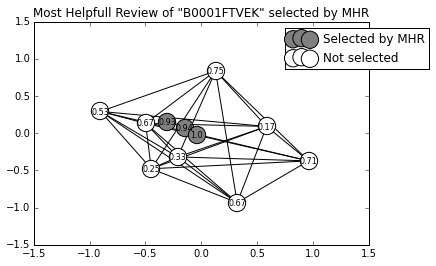

In [170]:
import matplotlib.pyplot as plt
df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0001FTVEK'])
#print reviews_features[reviews_features['asin']=='B00001WRSJ']['powerWithStar'].values
matrix, bin_matrix= mhr.getMatrix()
scores= mhr.getScores()
#import pandas as pd
import networkx as nx
#input_data = pd.read_csv('test.csv', index_col=0)

threshold = np.mean(matrix)*0.8
#for row in range(len(matrix)):
#    for col in range(len(matrix)):
#        if matrix[row, col] < threshold:
#            bin_matrix[row, col] = 1.0
#            #degrees[row] += 1
#        else:
#            bin_matrix[row, col] = 0
    
G = nx.Graph(bin_matrix)
#G=nx.cubical_graph(bin_matrix)





pos=nx.spring_layout(G,k=1) #


values_test = df['helpfulness'].values
#scores =df['powerWithStar'].values


node_sizes = scores * 6000


ind = (-np.array(scores)).argsort()
a = np.array(values_test)[ind]
            
            
            
#nx.draw_networkx_labels(G,pos,labels,node_size = node_sizes,font_size=8,font_color='r')

labels = {}
top_nodes=(-np.array(scores)).argsort()[:3]
bot_nodes= (np.array(values_test)).argsort()[:8]

selected_nodes=np.concatenate((top_nodes, bot_nodes), axis=0)
for node in G.nodes():
    if node not in top_nodes:
        G.remove_node(node)
    else:
        labels[node] = round(values_test[node],2)
        #del labels[node]
        #node_sizes = np.delete(node_sizes, node, 0)
        #del node_sizes[node]
        #print "removing " + str(node)
        #break

nx.draw_networkx_nodes(G,pos,labels=labels,  node_color='grey',label="Selected by MHR")

G = nx.Graph(matrix)
for node in G.nodes():
    if node not in bot_nodes:
        G.remove_node(node)
    else:
        labels[node] = round(values_test[node],2)
        #del labels[node]
        #node_sizes = np.delete(node_sizes, node, 0)
        #del node_sizes[node]
        #print "removing " + str(node)
        #break
nx.draw_networkx_nodes(G,pos,labels=labels, node_color='w',label="Not selected")

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.95]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] <0.8 and d['weight'] >=0.6)]
enone=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <0.6]


nx.draw_networkx_edges(G,pos,edgelist=elarge, width=0.2, )
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=0,)
nx.draw_networkx_edges(G,pos,edgelist=enone, width=0.0 , style='dashed', )
nx.draw_networkx_edges(G,pos)

plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.title('Most Helpfull Review of "B0001FTVEK" selected by MHR')
nx.draw_networkx_labels(G,pos,labels=labels,font_size=8,font_family='sans-serif')

plt.show()
